In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# General settings
figure_path = "./figures/main/"

# Load label error indices from Northcutt et al. (https://arxiv.org/abs/2103.14749)
# Image identifiers taken from: taken from: https://github.com/cleanlab/cleanlab/blob/master/examples/imagenet/imagenet_val_label_error_indices/imagenet_val_label_errors_unique_id_only.txt
label_error = np.load("imagenet_val_ident.npy", allow_pickle=True)[:, 2].astype(np.int)
error_inds = np.where(label_error == 1)
right_inds = np.where(label_error == 0)

In [3]:
# Seaborn settings
sns.set_palette(sns.color_palette("magma"))
sns.set_style("ticks")
sns.set_style({'font.family': 'Lato'})
sns.set_context("paper", font_scale = 1.8)

## Figure 3

In [4]:
from scripts.analysis_helpers import main_plot

# Set base network and conditions
base_network = "Res18"
folder_name = f"./results/{base_network}/"

# Load main array
main = np.load(folder_name + f"{base_network}_main_array.npy", allow_pickle=True)

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


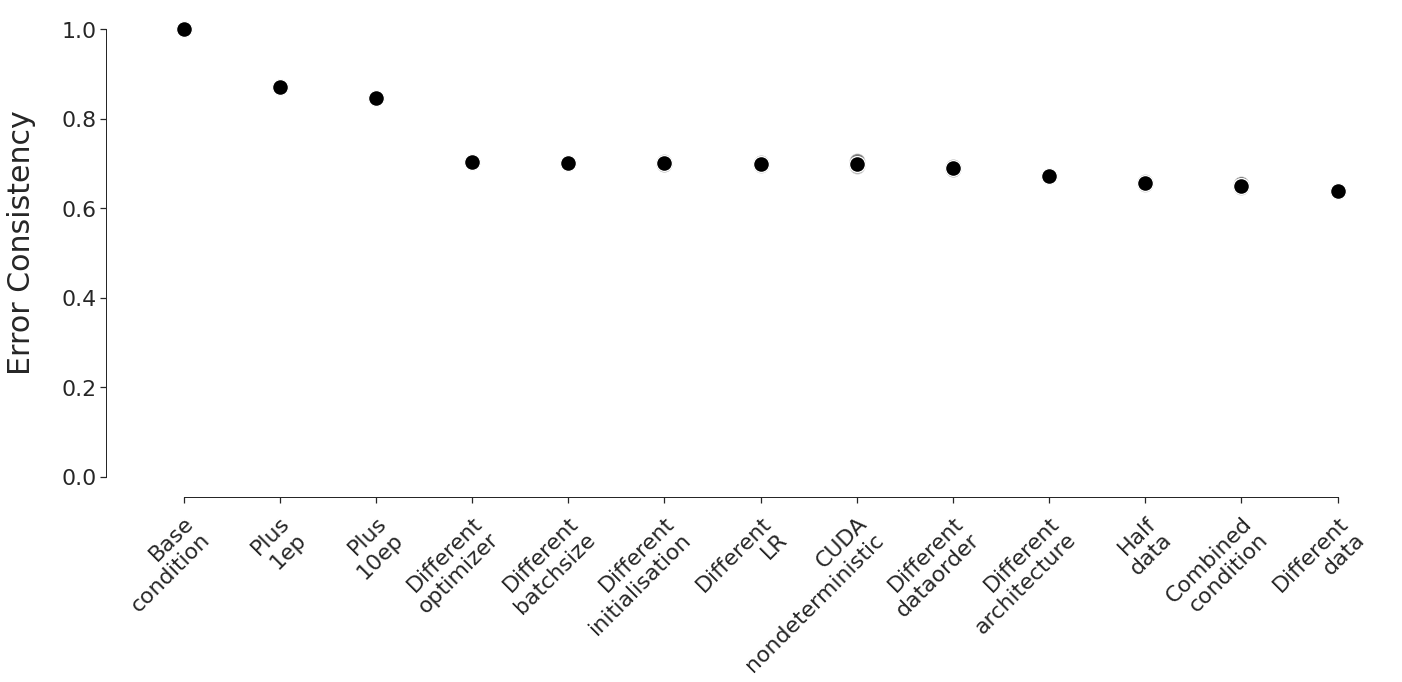

In [5]:
epoch = 90

# Order main array according to last epoch
num_epochs = main.shape[0]
num_conditions = main.shape[1]
econ_means = np.zeros(num_conditions)

# Order conditions by highest mean
fig = plt.figure(figsize=(20, 10))

# Fill array for mean values
econ_means = np.nanmean(main[epoch, : , 1:], axis=1)

# Order arrays from high to low
order_high_low = np.flip(np.argsort(econ_means))
ordered_means = econ_means[order_high_low]
ordered_econs = main[epoch, order_high_low, 1:]

# Remove first \n from labels
labels = main[epoch, order_high_low, 0]
labels_correct = np.empty(len(labels), dtype=object)
for ind, label in enumerate(labels):
    labels_correct[ind] = label[1:]

#plt.xticks(np.arange(0, len(main[0, :, 0]), 1), labels = np.arange(1,12,1), rotation=60)
for ind in range(num_conditions):
    ax = sns.scatterplot(y=ordered_econs[ind], x=ind, s=250, marker='o', color='black', alpha=0.5)

# Plot means and individual models
ax = sns.scatterplot(data=ordered_means, s=250, marker='o', color='black', alpha=1.0)

# Plot settings
sns.set(font_scale = 2)
ax.set_ylabel("Error Consistency", fontsize=30, labelpad=25)
ax.set_ylim(0, 1.05)
ax.set_xticks(np.arange(0, len(main[0, :, 0]), 1))
ax.set_xticklabels(labels_correct, ha='right')

# Context setting and saving plot
sns.despine(top=True, right=True, offset=20, trim=True)
ax.tick_params(axis = 'x', pad=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
plt.savefig(figure_path + 'figure_3.png', bbox_inches='tight')